## Importing the required Libraries

In [74]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input, Concatenate
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Fetch the dataset

In [75]:
housing_data = fetch_california_housing()
housing_data
# This is a dictionary with important information about the dataset.
# housing_data['data']: Contains all the independent features.
# housing_data['target']: Contains respective target values.
# housing_data['feature_names']: Feature Names


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Getting feature set dataframe

In [76]:

X = pd.DataFrame(housing_data.data,columns=housing_data.feature_names)
X # Now we have feature set dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Target set dataframe

In [77]:
y = pd.DataFrame(housing_data.target,columns=housing_data.target_names)
y # Now we have target valuees as a dataframe

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


### Train Test Split for later evaluation

In [78]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.2)

### Scaling data for faster training

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
X.shape

(20640, 8)

### Training our basic MLP on Sequential API.

In [81]:

model = Sequential()
model.add(Dense(30,activation='relu',input_shape=X.shape[1:]))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: 1.6619 - val_loss: 0.8191
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: 0.6459 - val_loss: 0.6322
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4974 - val_loss: 0.5368
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4449 - val_loss: 0.4717
Epoch 5/20
465/465 [==============================] - 1s 1ms/step - loss: 0.4175 - val_loss: 0.4635
Epoch 6/20
465/465 [==============================] - 1s 1ms/step - loss: 0.4028 - val_loss: 0.4333
Epoch 7/20
465/465 [==============================] - 1s 1ms/step - loss: 0.3957 - val_loss: 0.4334
Epoch 8/20
465/465 [==============================] - 1s 1ms/step - loss: 0.3839 - val_loss: 0.4209
Epoch 9/20
465/465 [==============================] - 1s 1ms/step - loss: 0.3772 - val_loss: 0.4101
Epoch 10/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3715 - val_loss: 0.4317

### Evaluating the model

In [82]:

y_pred = model.predict(X_test)
mse = np.array(tf.metrics.mean_squared_error(y_test, y_pred)).mean()
print(f"The Average mse of our run : {mse}")

The Average mse of our run : 0.33795446157455444


In [83]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3380


0.33795449137687683

The Overall loss is 0.33237746357917786, not that good

### Visualizing Val and Training Loss

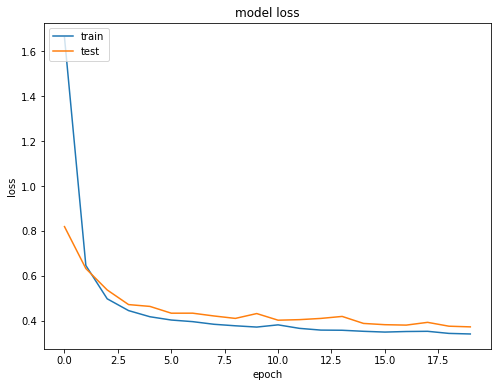

In [84]:

# summarize history for loss
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NN using Functional API 

 Making and visualizing the model, Functional API is very flexible and allows us to visualize architecture like this

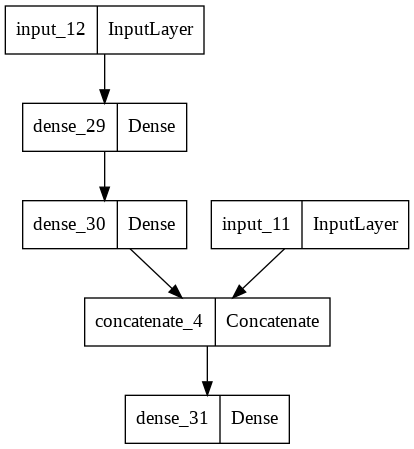

In [85]:

inputA = Input(shape=[5])
inputB = Input(shape=[6])
h1 = Dense(units = 30,activation='relu')(inputB)
h2 = Dense(30,activation='relu')(h1)
concat = Concatenate()([h2,inputA])
output = Dense(1)(concat)
model = keras.Model(inputs=[inputA,inputB],outputs=output)
keras.utils.plot_model(model, "my_first_model.png")

In [86]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 6)]          0           []                               
                                                                                                  
 dense_29 (Dense)               (None, 30)           210         ['input_12[0][0]']               
                                                                                                  
 dense_30 (Dense)               (None, 30)           930         ['dense_29[0][0]']               
                                                                                                  
 input_11 (InputLayer)          [(None, 5)]          0           []                               
                                                                                            

In [87]:
X_train[:,:2].shape

(16512, 2)

### Making compatible shapes for traiin and test sets

In [88]:
X_trainA,X_trainB = X_train[:,:5] , X_train[:,2:]
X_testA,X_testB  = X_test[:,:5] ,X_test[:,2:]

In [89]:
X_trainA.shape

(16512, 5)

### Compiling and training the model

In [90]:
model.compile(optimizer='adam',loss='mse',metrics=[tf.metrics.RootMeanSquaredError()])
history = model.fit([X_trainA,X_trainB],y_train,epochs=20,validation_split=0.1)

Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: 1.5673 - root_mean_squared_error: 1.2519 - val_loss: 0.7489 - val_root_mean_squared_error: 0.8654
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: 0.5624 - root_mean_squared_error: 0.7499 - val_loss: 0.5204 - val_root_mean_squared_error: 0.7214
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4564 - root_mean_squared_error: 0.6756 - val_loss: 0.4652 - val_root_mean_squared_error: 0.6820
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4086 - root_mean_squared_error: 0.6392 - val_loss: 0.4566 - val_root_mean_squared_error: 0.6757
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3813 - root_mean_squared_error: 0.6175 - val_loss: 0.4191 - val_root_mean_squared_error: 0.6473
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3744 - root_mean_squared_error: 0.6119 - val_loss: 0.3974 - val_

In [91]:
model.evaluate([X_testA,X_testB ],y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3089 - root_mean_squared_error: 0.5558


[0.3088931739330292, 0.5557816028594971]

### Loss is lower than the older model we trained 

### Visualizing Val and Train loss

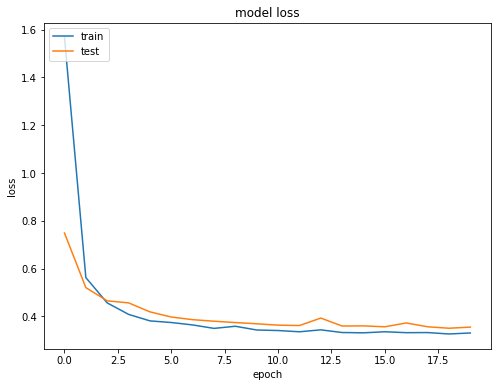

In [92]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# The End